<a href="https://colab.research.google.com/github/EmmanuelABonsu/CE888/blob/main/src/project/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Importing Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from keras import models, layers, optimizers 


import os                         # For operating system
import re                         # Regular expression 
import cv2                        # Image processing 
import glob                       # Unix style pathname pattern expansion
import random                     # For random number generation 
import shutil                     # High-level file operations
import requests                   # Reading url 
from PIL import Image             # Python Image Library 
from bs4 import BeautifulSoup     # Web scrapping 
import matplotlib.pyplot as plt   # Making plots 
import matplotlib.image as mpimg

In [20]:
# Defining file paths. Model data is stored in Google drive
training_dir = "drive/MyDrive/CE888_data/Training"
testing_dir = "drive/MyDrive/CE888_data/Test"
img_dimension = (254, 254)
batch_size=128

In [17]:

def image_collage(path, n_rows, n_cols, title):
    # Initiating the plot 
    fig = plt.figure(figsize=(10,10))
    plt.title(title) 
      
    # Turns off axis from the collage (total plot)
    plt.axis('Off')
    
    # List of all images in the path
    img_list = os.listdir(path)

    img_num = 1
    for img in img_list[:n_rows*n_cols]:
        
        # directroies of the choosen images 
        img_path = os.path.join(path, img)
        
        # showing the color images 
        img_read = mpimg.imread(img_path)

        # collage is formed from subplot
        ax = fig.add_subplot(n_rows, n_cols, img_num)
        img_num += 1
        
        # displaying image in subplot 
        ax.imshow(img_read)
        
        # turns off the axis from individual image in the collage
        ax.axis('Off')

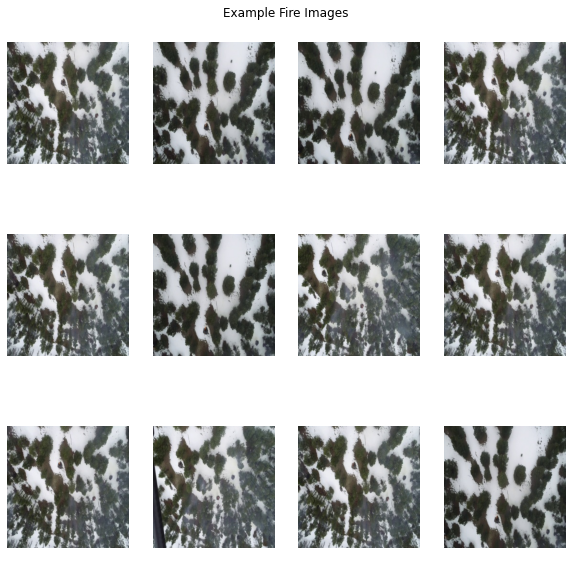

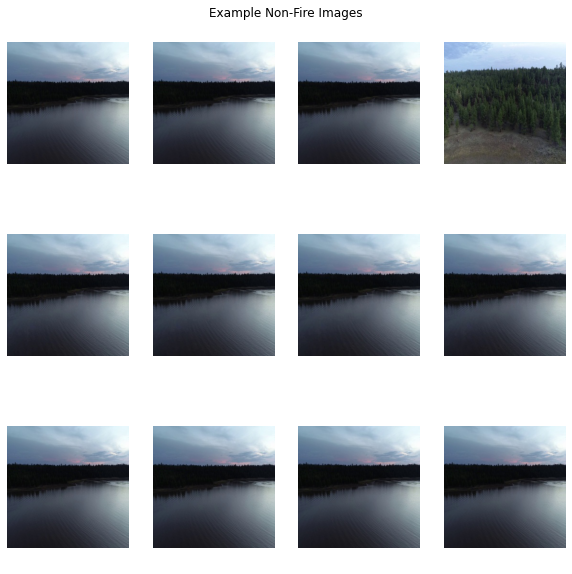

In [23]:
image_collage(training_dir + "/Fire", 3, 4, 'Example Fire Images')
image_collage(training_dir + "/No_Fire", 3, 4, 'Example Non-Fire Images')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(training_dir, 
                                                   target_size=img_dimension, 
                                                   batch_size=batch_size,
                                                   class_mode='binary')

test_generator = test_datagen.flow_from_directory(testing_dir, 
                                                   target_size=img_dimension, 
                                                   batch_size= batch_size,
                                                   class_mode='binary')

In [ ]:
# Load Pre-trained CNN
pre_trained_model = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(img_width, img_height, 3)
)
# pre_trained_model.summary()

In [64]:
# Building Custom model
model = models.Sequential()
model.add(pre_trained_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

pre_trained_model.trainable = False

model.compile(loss='binary_crossentropy', 
             optimizer=optimizers.RMSprop(lr=1e-4), 
             metrics=['acc'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               6422784   
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


In [65]:
# Extracting features 
# import os, shutil
# from keras.preprocessing.image import ImageDataGenerator

# # labels = ['Fire', 'No_Fire']
# datagen = ImageDataGenerator(rescale=1./255)
# batch_size = 512

In [66]:
# def extract_features_with_pretrained_model(directory, data_size):
#   features = np.zeros(shape=(data_size, 7, 7, 512))
#   labels = np.zeros(shape=(data_size,2))

#   generator = datagen.flow_from_directory(directory,
#                                             target_size=(img_width,img_height),
#                                             batch_size = batch_size,
#                                             class_mode='binary')
#   print("Entering Loop......................")
#   i = 0
#   for inputs_batch, labels_batch in generator:
#       features_batch = pre_trained_model.predict(inputs_batch)
#       features[i * batch_size: (i + 1) * batch_size] = features_batch
#       labels[i * batch_size: (i + 1) * batch_size] = labels_batch
#       i += 1
#       if i * batch_size >= data_size:
#           break
#   return features, labels

In [67]:
# train_features, train_labels = extract_features_with_pretrained_model(training_dir, 39375)

In [68]:
# training_features

Found 39375 images belonging to 2 classes.
Found 8617 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator, epochs=5, 
                    validation_data=test_generator)

Epoch 1/30
